In [1]:
import os 
import cv2
import glob
import warnings
import detectron2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.structures import BoxMode
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data.datasets import register_coco_instances
from detectron2.engine import DefaultTrainer, DefaultPredictor
warnings.filterwarnings(action='ignore', category=FutureWarning)
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

C:\Users\ba995\anaconda3\envs\detectron\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
register_coco_instances('tooth_train', {}, 'train/_annotations.coco.json', 'train')
register_coco_instances('tooth_val', {}, 'valid/_annotations.coco.json', 'valid')

In [3]:
train_metadata =  MetadataCatalog.get('tooth_train')
train_dataset = DatasetCatalog.get('tooth_train')

In [4]:
len(train_metadata.get('thing_classes', 0))

35

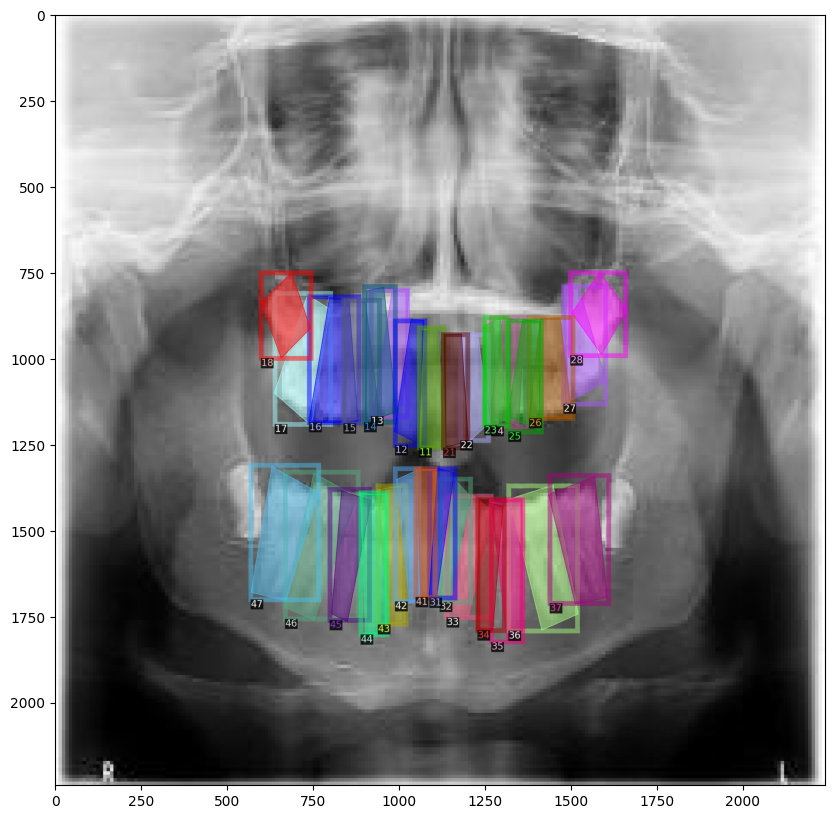

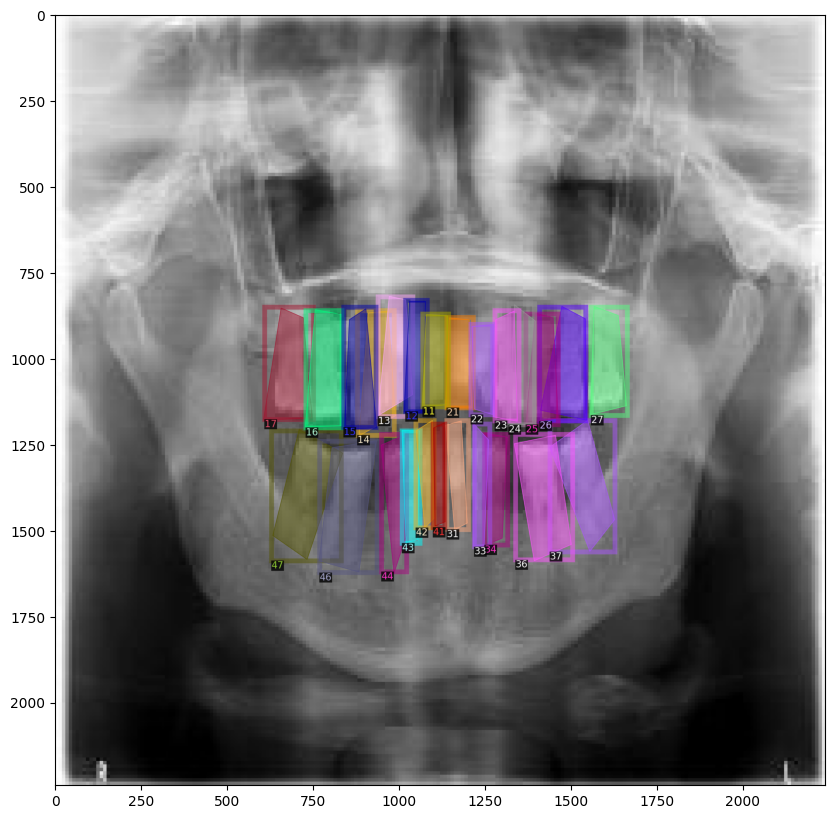

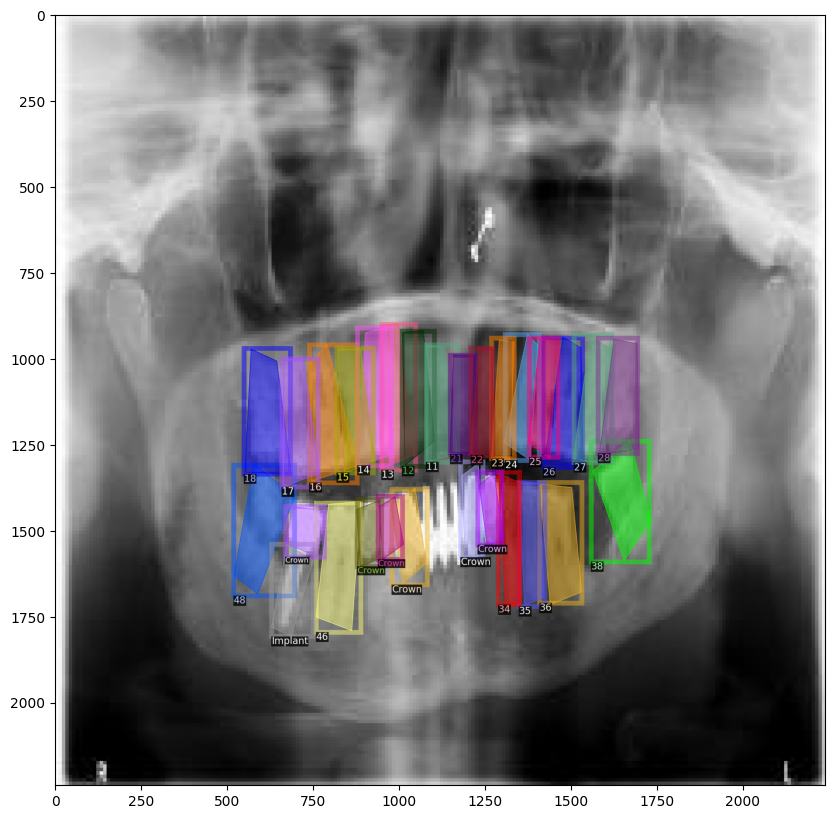

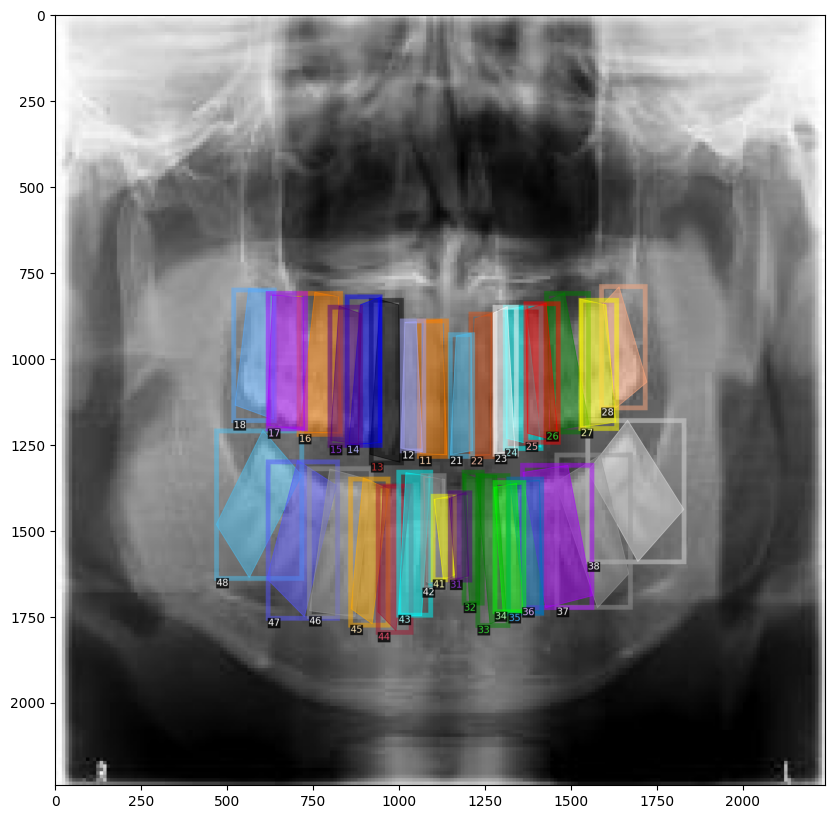

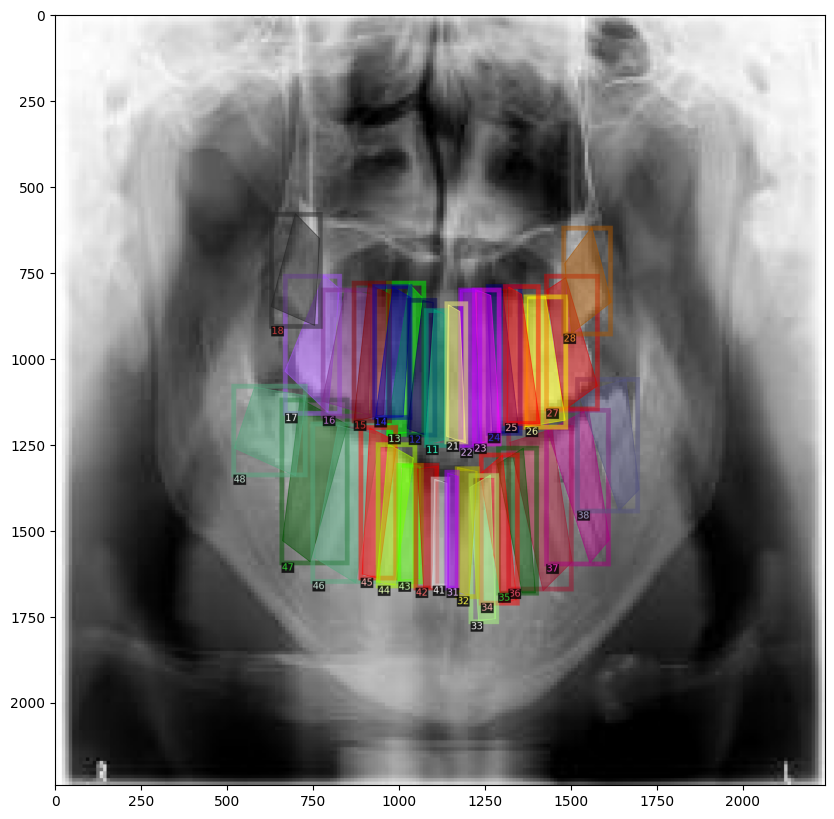

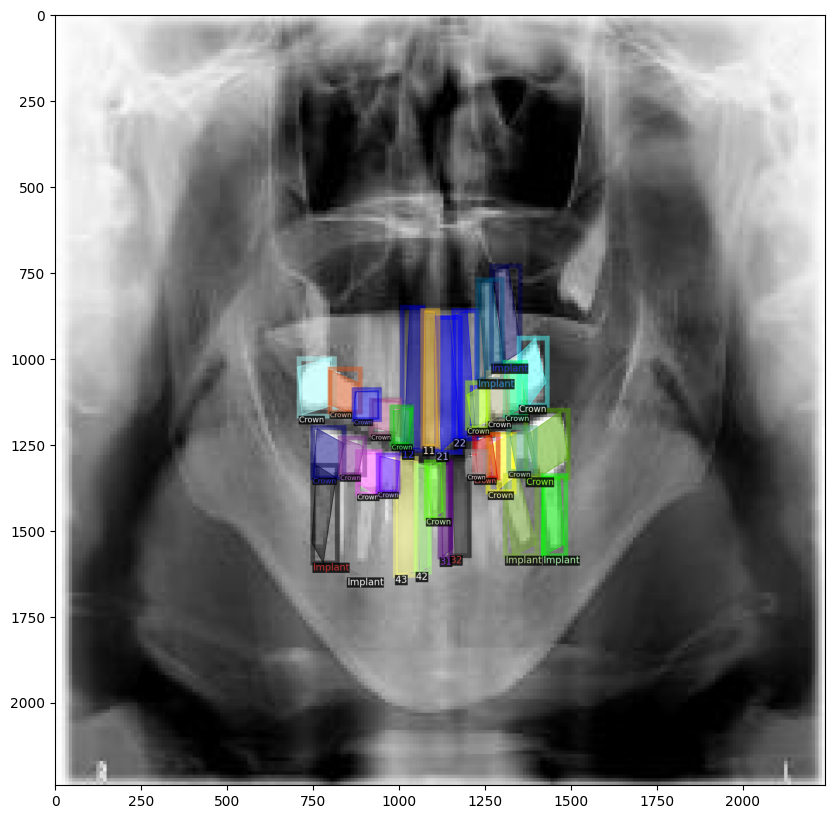

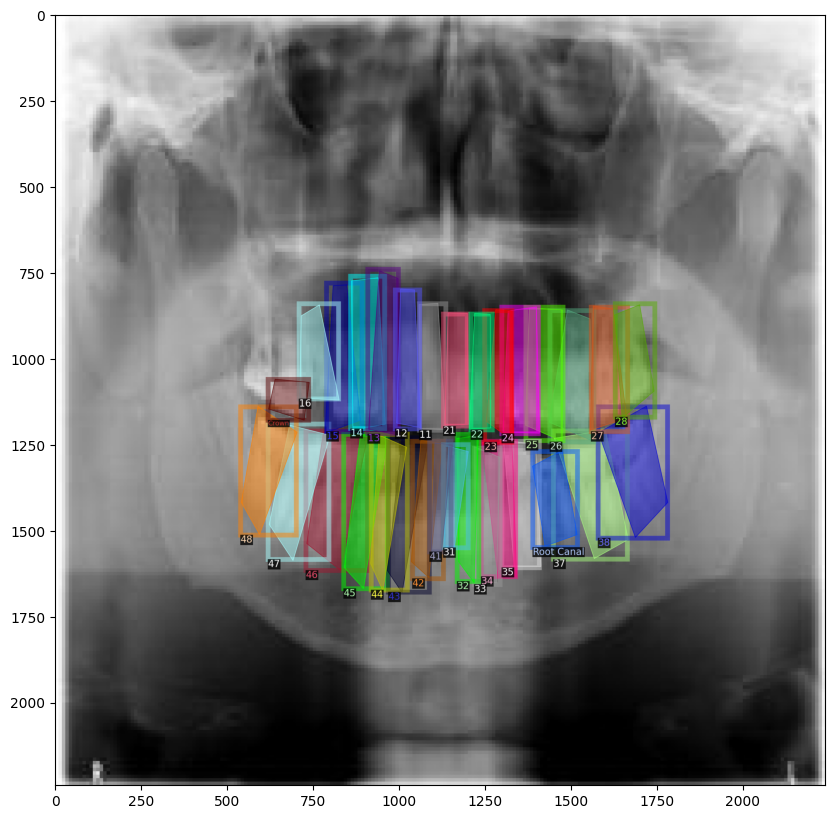

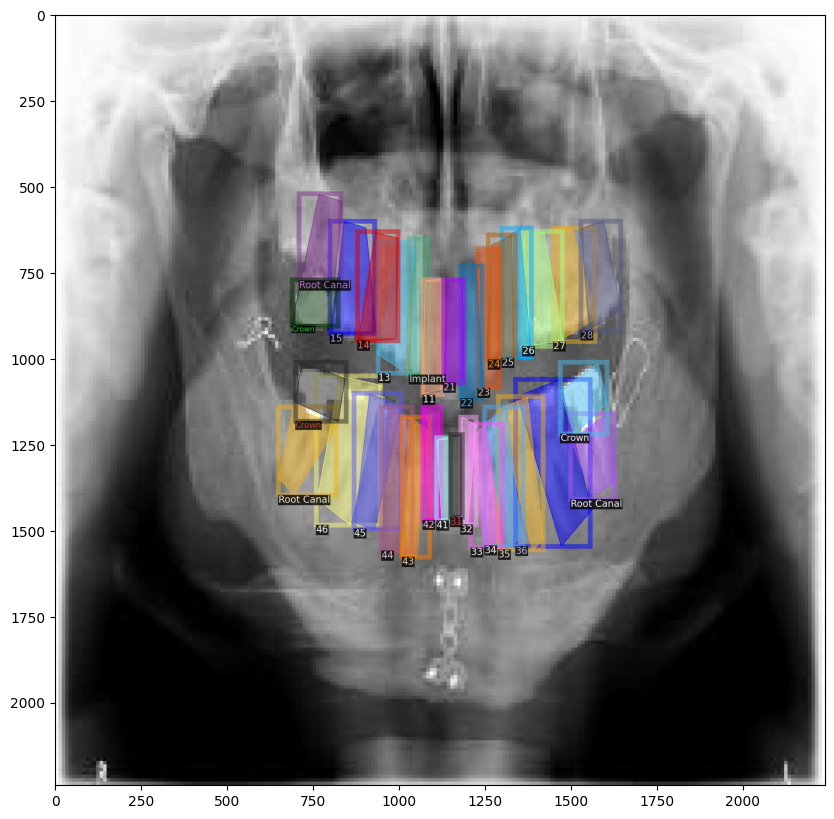

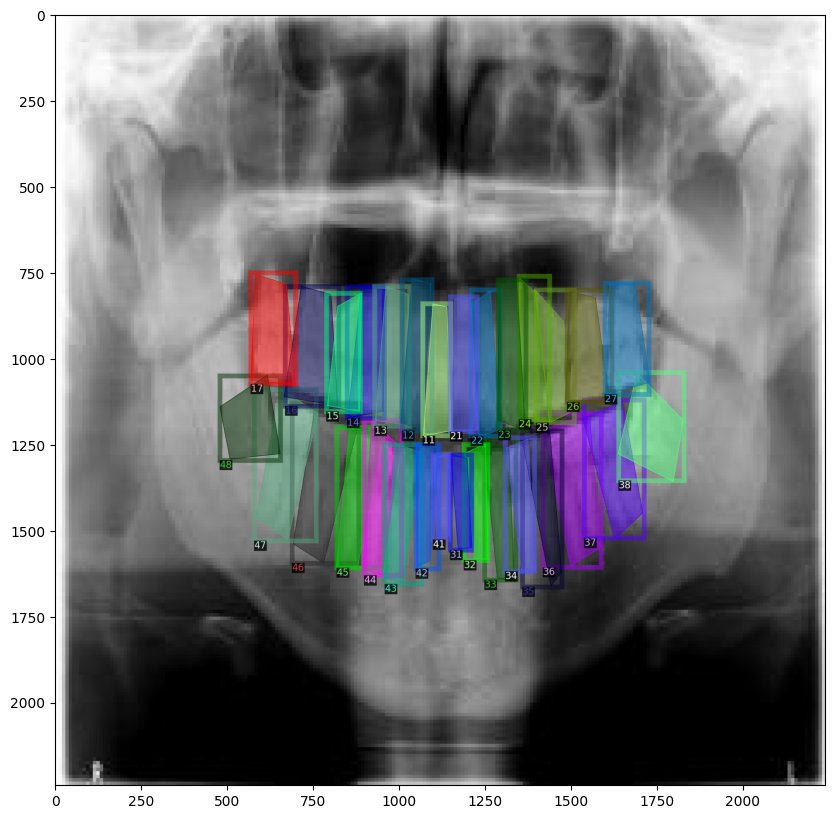

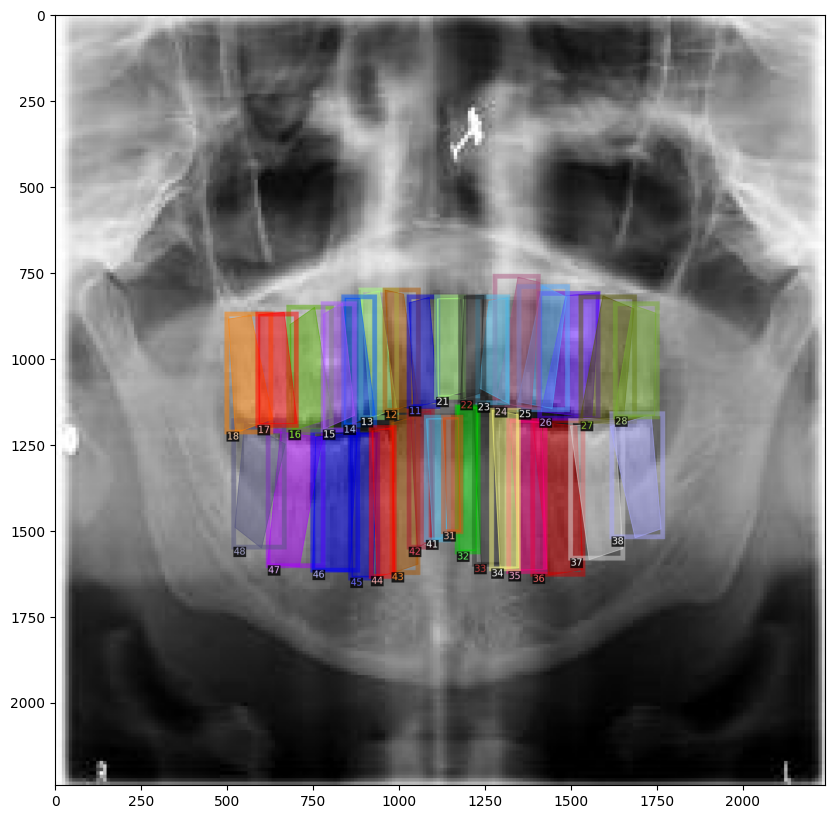

In [5]:
import random

for d in random.sample(train_dataset, 10):
    img = cv2.imread(d["file_name"])
    v = Visualizer(img[:, :, ::-1], metadata=train_metadata, scale=10)
    v = v.draw_dataset_dict(d)
    plt.figure(figsize = (10, 10))
    plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
    plt.show()
     

In [6]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file('COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml'))
cfg.DATASETS.TRAIN = ('tooth_train')
cfg.DATASETS.TEST = ('tooth_val',) 
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url('COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml')
cfg.SOLVER.IMS_PER_BATCH = 1
# cfg.SOLVER.BASE_LR = 0.1
cfg.SOLVER.MAX_ITER = 10000
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 36
num_gpu = 1
bs = (num_gpu * 2)
cfg.SOLVER.BASE_LR = 0.02 * bs / 16 

In [7]:
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)

[09/02 17:33:04 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (37, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (37,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (144, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (144,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to incompatible shapes: (80, 256, 1, 1) in the checkpoint but (36, 256, 1

In [8]:
trainer.train()


[09/02 17:33:04 d2.engine.train_loop]: Starting training from iteration 0


C:\Users\ba995\anaconda3\envs\detectron\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[09/02 17:33:18 d2.utils.events]:  eta: 1:33:00  iter: 19  total_loss: 5.994  loss_cls: 3.56  loss_box_reg: 0.7337  loss_mask: 0.6931  loss_rpn_cls: 0.7285  loss_rpn_loc: 0.3115    time: 0.5566  last_time: 0.6374  data_time: 0.0819  last_data_time: 0.0011   lr: 4.9952e-05  max_mem: 3222M
[09/02 17:33:29 d2.utils.events]:  eta: 1:28:39  iter: 39  total_loss: 4.508  loss_cls: 2.619  loss_box_reg: 0.8337  loss_mask: 0.6923  loss_rpn_cls: 0.1719  loss_rpn_loc: 0.2354    time: 0.5425  last_time: 0.4579  data_time: 0.0007  last_data_time: 0.0010   lr: 9.9902e-05  max_mem: 3222M
[09/02 17:33:41 d2.utils.events]:  eta: 1:31:30  iter: 59  total_loss: 3.376  loss_cls: 1.494  loss_box_reg: 0.8424  loss_mask: 0.69  loss_rpn_cls: 0.1004  loss_rpn_loc: 0.2346    time: 0.5505  last_time: 0.4692  data_time: 0.0007  last_data_time: 0.0003   lr: 0.00014985  max_mem: 3222M
[09/02 17:33:52 d2.utils.events]:  eta: 1:30:59  iter: 79  total_loss: 3.085  loss_cls: 1.314  loss_box_reg: 0.8306  loss_mask: 0.685

In [9]:
c = get_cfg()
c.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, 'model_final.pth')
c.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
c.DATASETS.TEST = ('tooth_val',) 
pred = DefaultPredictor(c)

[09/01 23:03:53 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output\model_final.pth ...


In [10]:
test_metadata =  MetadataCatalog.get('tooth_val')
test_dataset = DatasetCatalog.get('tooth_val')

[09/01 23:04:00 d2.data.datasets.coco]: Loaded 113 images in COCO format from valid/_annotations.coco.json


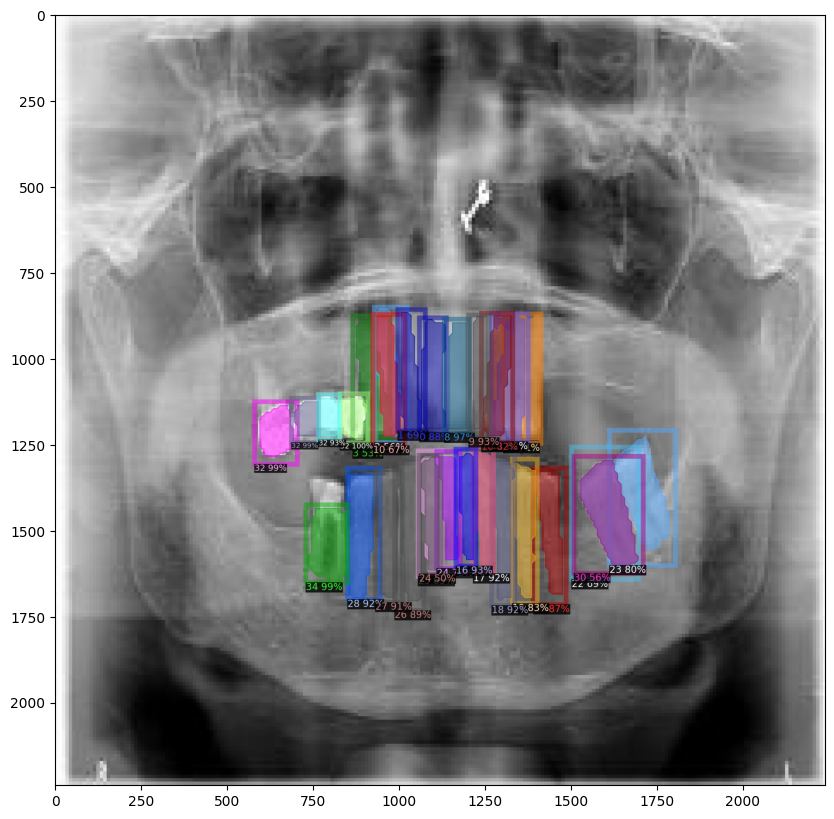

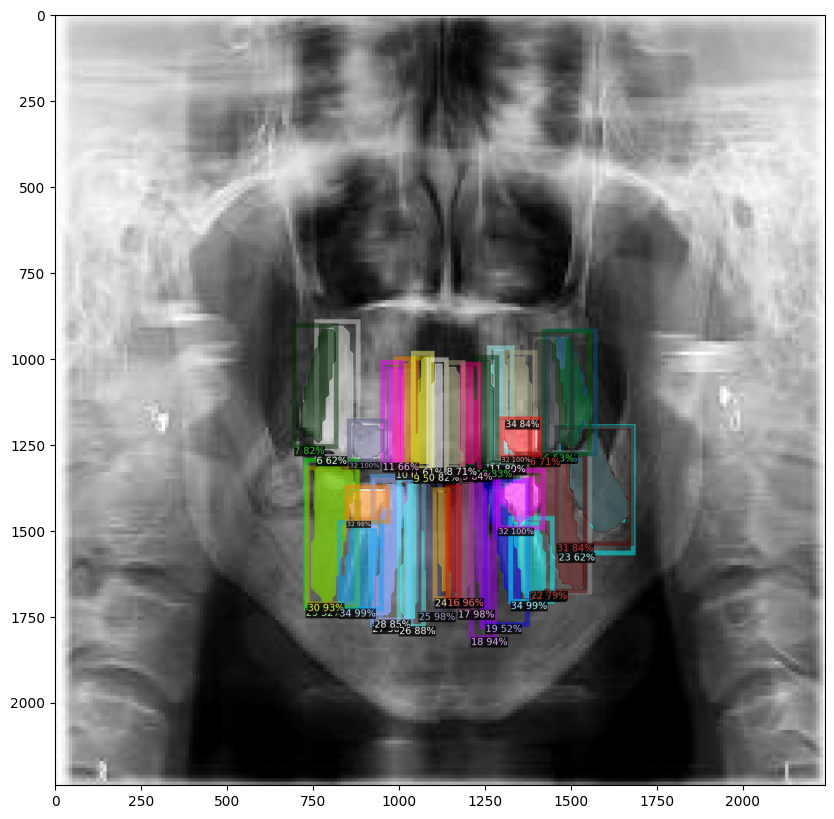

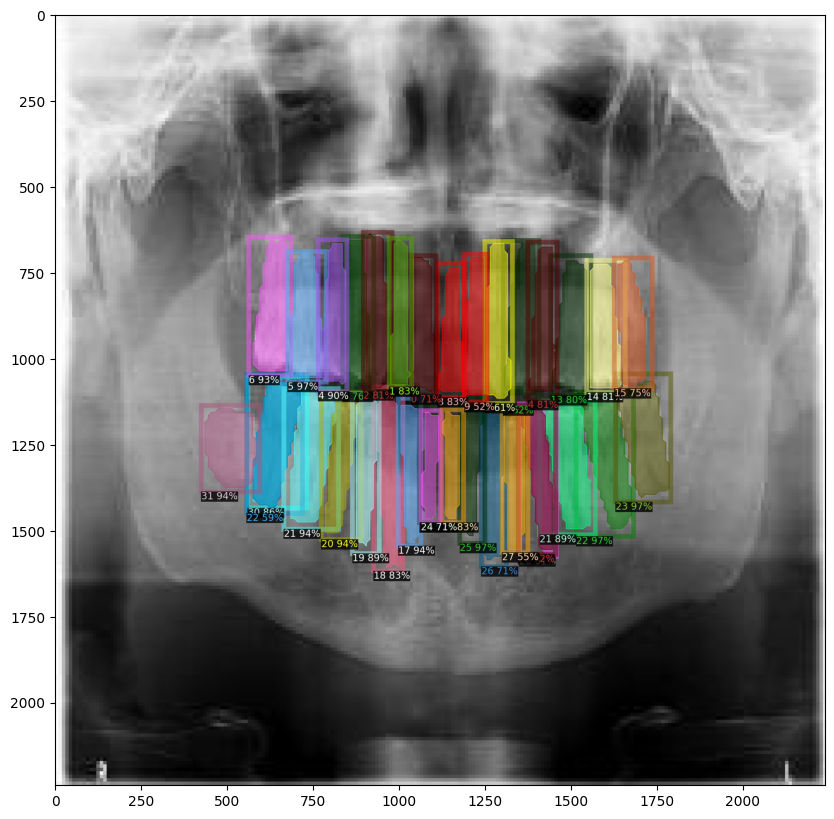

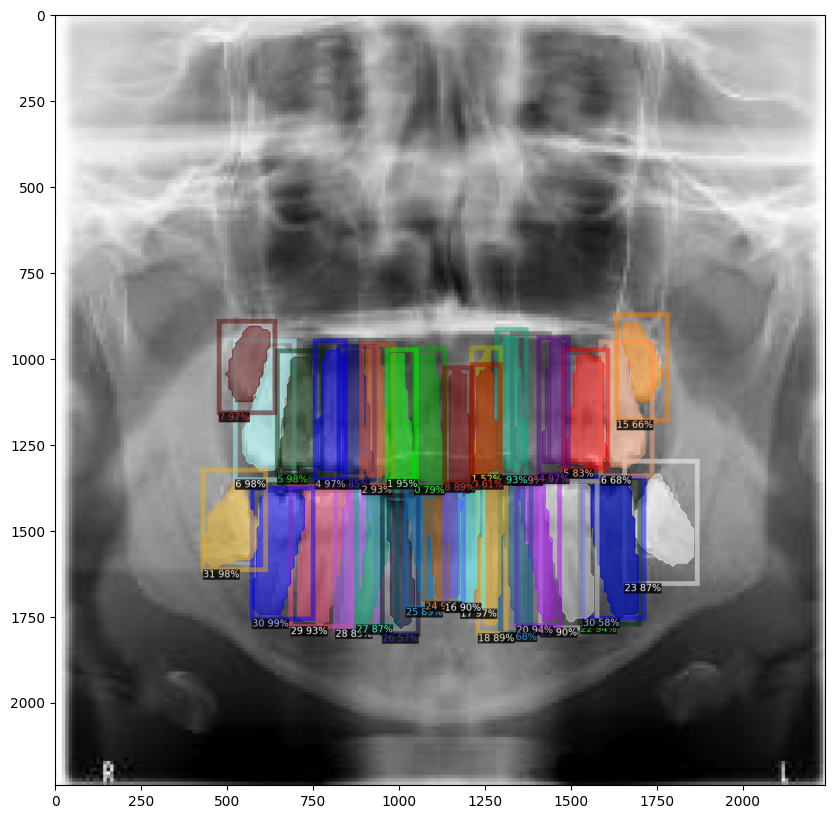

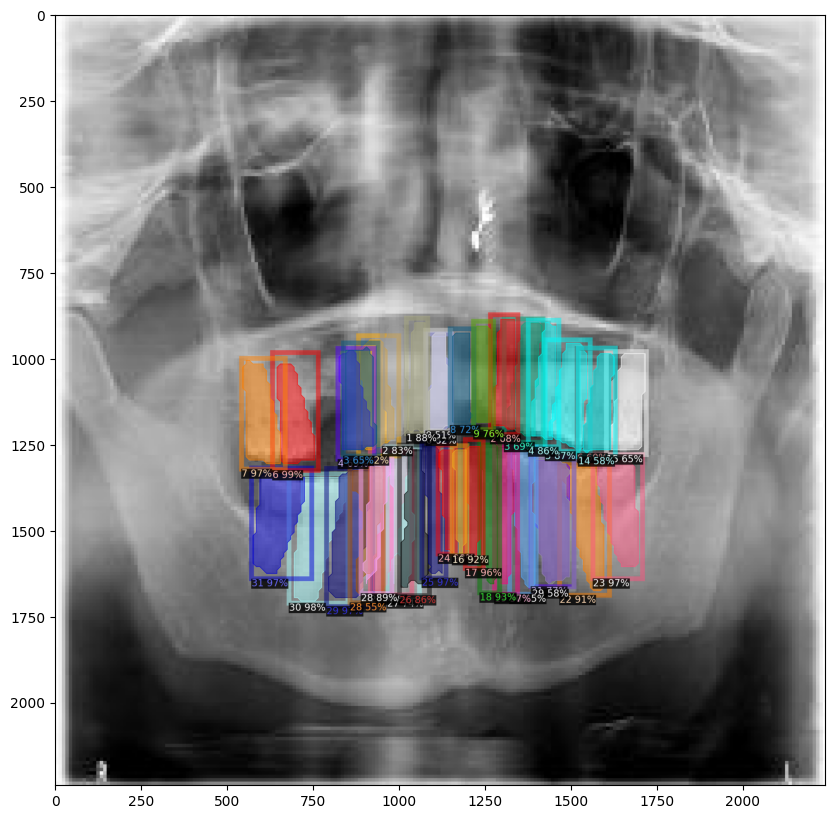

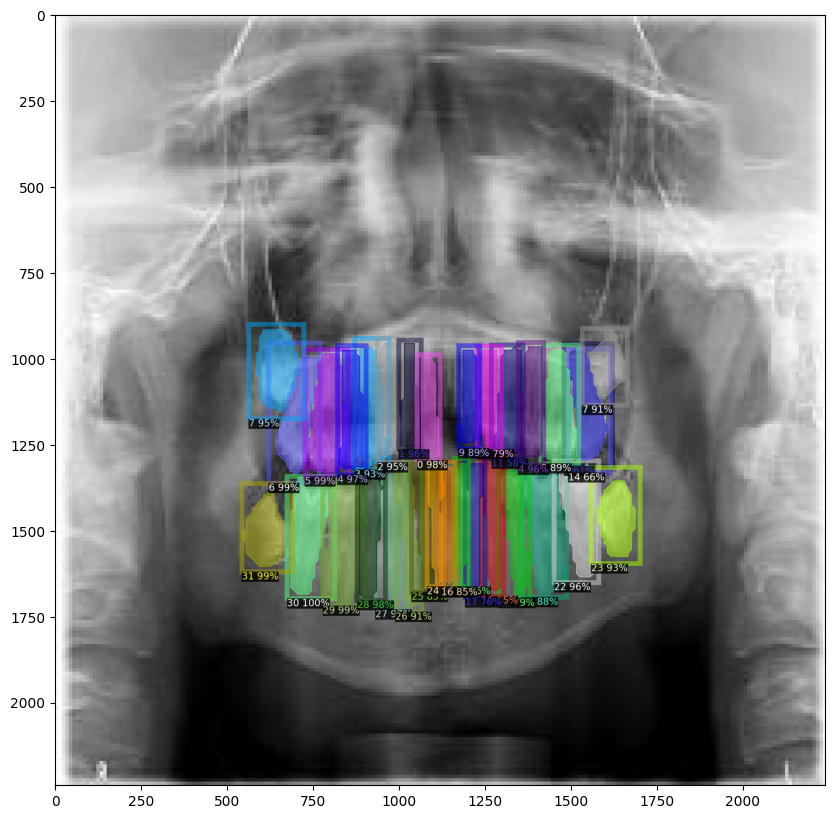

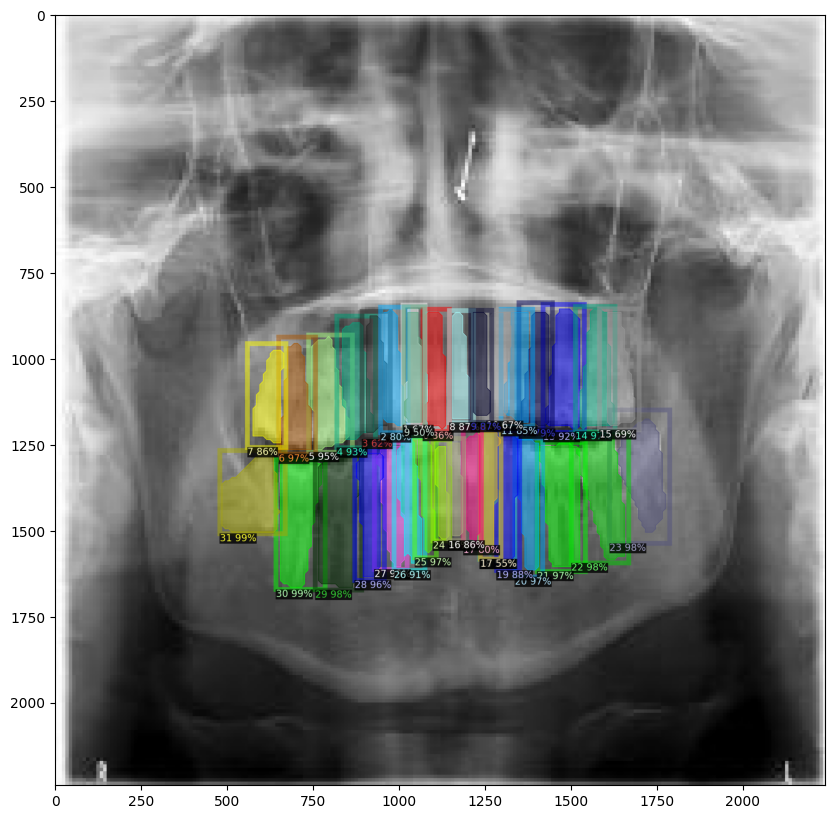

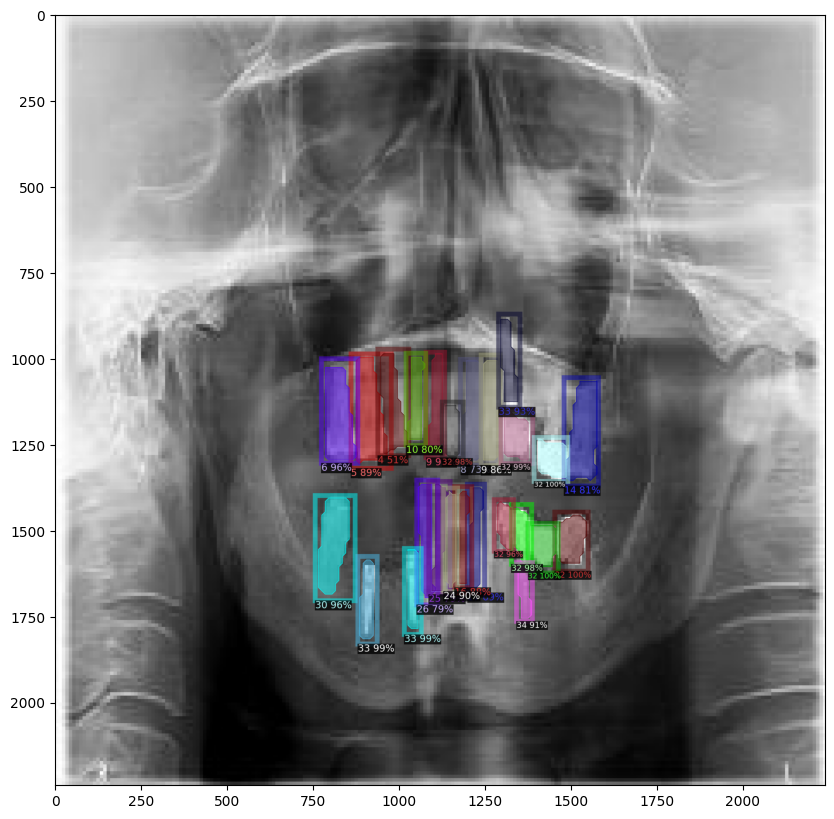

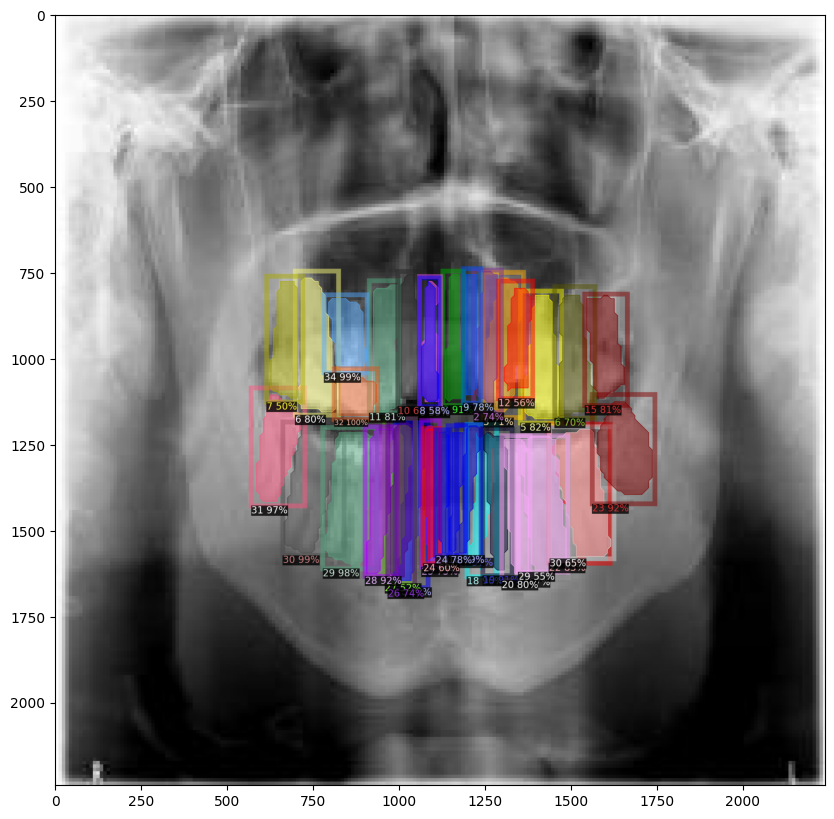

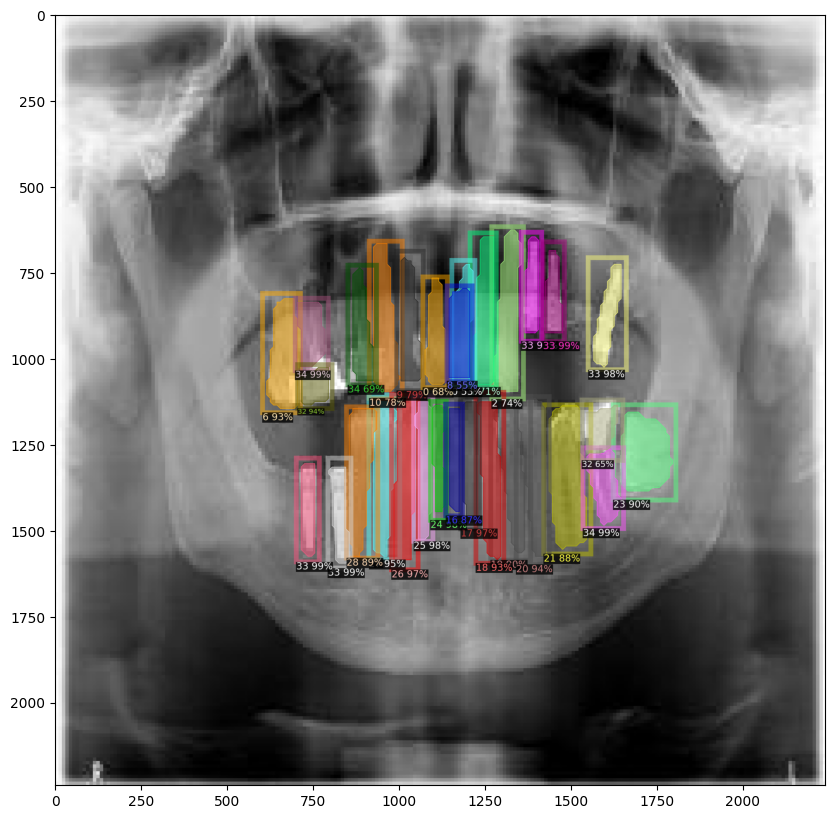

In [11]:
for d in random.sample(test_dataset, 10):
    img = cv2.imread(d['file_name'])
    out = pred(img)
    v = Visualizer(img[:, :, ::-1], metadata={}, scale=10)
    v = v.draw_instance_predictions(out['instances'].to('cpu'))
    plt.figure(figsize=(14, 10))
    plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
    plt.show()